In [1]:
import numpy as np
import plotly.express as px
import pandas as pd
import statsmodels as sm

### 
# Section 1: Construct Trend, Seasonality, and Residual Components
In today's lecture, we'll separately fabricate trend, seasonal, and error components 
as a pedagogical exercise. The aim is to illustrate the fundamentals of constructing a 
basic time series dataset, paving the way for more advanced topics. For now, lt's generate a time sequence in minute intervals.

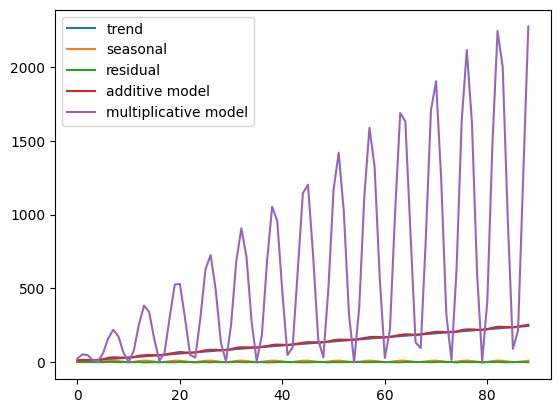

In [11]:
# Define time
time = np.arange(1, 90)
trend_component = time * 2.75
seasonal_component = (np.sin(time) + 1) * 5
np.random.seed(42)
residual_component = np.random.normal(0, 1, 89)
additive = trend_component + seasonal_component + residual_component
multiplicative = trend_component * seasonal_component

import matplotlib.pyplot as plt

#plt.plot(time, label='time')
plt.plot(trend_component, label='trend')
plt.plot(seasonal_component, label='seasonal')
plt.plot(residual_component, label='residual')
plt.plot(additive, label='additive model')
plt.plot(multiplicative, label='multiplicative model')
plt.legend()
plt.show()

## Exercise 1
1. Initialize the Time Series: Start by initializing a time series with the time ranging from 1 to 90. Use NumPy's arange method for this.
2. Create the Trend Component: Generate a trend component by multiplying the time series by 2.75.
3. Create the Seasonal Component: Generate a seasonal component using a sinusoidal function.
4. Create the Residual Component: Generate a residual (or error) component with a normal distribution centered at 0 and a standard deviation of 1. Make sure to set a random seed **42** for reproducible results.
5. Create an Additive Model: Combine the trend, seasonal, and residual components to form an additive time series model.
6. Create a Multiplicative Model: Use the trend and seasonal components to create a multiplicative model. For this exercise, we will ignore the residual component by setting it to one.


### Expected Outcomes:
You should be able to visualize the individual components: trend, seasonal, and residual.
You will create two composite time series: one additive and one multiplicative, and understand how each component contributes to the overall time series.


### Additional Notes:
Make sure to label the axes and provide legends in the plots for better understanding.
Feel free to experiment with different constants and functions for generating the trend and seasonal components.

## Exercise 2
In this exercise, your task is two-fold:
1. Determine if **Dataset_A** and **Dataset_B** are additive or multiplicative time series.
2. Determine the frequency of the seasonal component.

### Dataset A

In [14]:
PATH_TO_FILE = "../data/tsa01/dataset_A.npy"
dataset_a = np.load(PATH_TO_FILE)

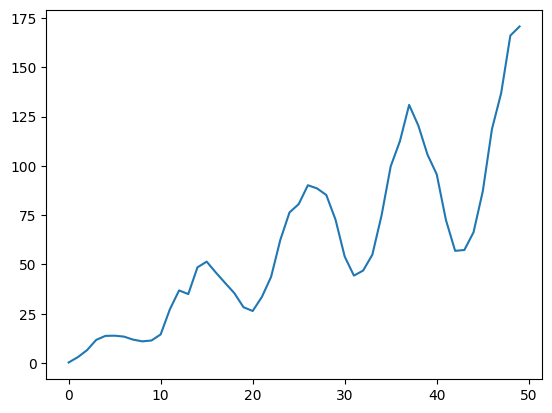

In [15]:
plt.plot(dataset_a)
plt.show()

#### Qeustions Dataset A
Q1: Is the time series of Dataset A Additiv or Multiplicative

A1: Multiplicative

Q2: What is the frequency of the time series:

A2: 12

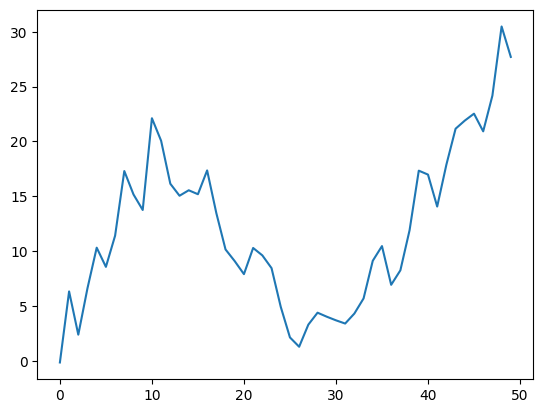

In [16]:
PATH_TO_FILE = "../data/tsa01/dataset_B.npy"
dataset_b = np.load(PATH_TO_FILE)
plt.plot(dataset_b)
plt.show()

#### Qeustions Dataset B
Q1: Is the time series of Dataset B Additiv or Multiplicative

A1: Additiv

Q2: What is the frequency of the time series:

A2: 40

## Exercise 3

In this section, we'll switch gears to deconstruct time series data into its core elements. We'll explore both additive and multiplicative time series and dissect them into their primary components: trend, seasonality, and residual noise.

It's crucial to clarify that our objective here isn't to delve into the intricacies of how this decomposition occurs. Instead, our aim is to demonstrate that time series data, once created, can be broken down into these foundational components for further analysis.

**Note**: You can either use statsmodels decompose method or the one from darts package

**Task**
In this exercise, your task is decompose **Dataset_A** and **Dataset_B**. You should first create a
decomposition model in Python. Then you should plot the original series, the trend, seasonality, and residuals, in that order. 

In [17]:
dataset_a = np.load("../data/tsa01/dataset_A.npy")
dataset_b = np.load("../data/tsa01/dataset_B.npy")

### Dataset A

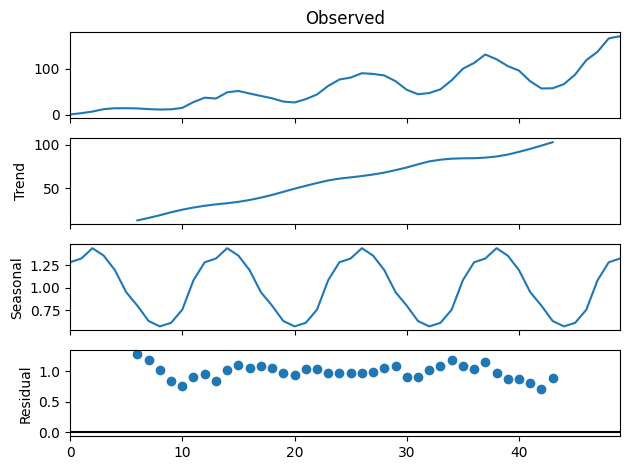

In [27]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(dataset_a, model='multiplicative', period=12)
result.plot()
plt.show()

### Dataset B

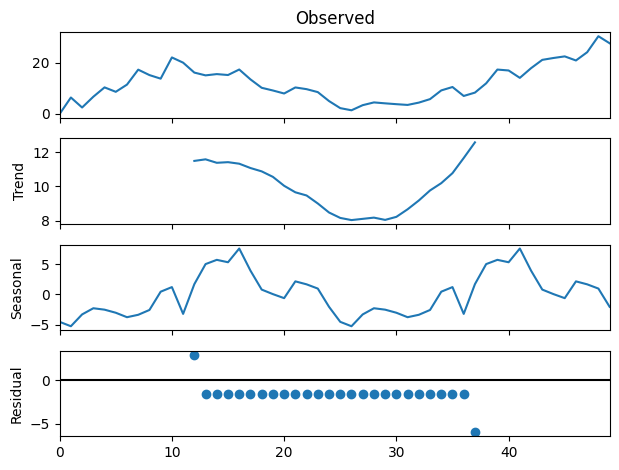

In [31]:
result = seasonal_decompose(dataset_b, model='additive', period=25)
result.plot()
plt.show()

## Topic: Stationarity

To assess and compare the stationarity of two different time series datasets (births and airline passengers) using various techniques.

Methods to be Used:
- Run-sequence plot
- Summary statistics (mean and variance)
- Histogram plots
- Augmented Dickey-Fuller (ADF) test


**Task:**
1. Correctly identify whether each dataset is stationary or non-stationary.
2. Correctly interpret the summary statistics, histograms, and ADF test results.
3. Provide a coherent comparative analysis of the stationarity of both datasets.

### Exercise 4: Run-Sequence Plot
Task:
Plot a run-sequence plot for both the airline passengers and births datasets to visually inspect them for any obvious trends, seasonality, or other non-stationary behaviors.

In [36]:
import pandas as pd
# Load datasets
airline_data = pd.read_csv("../data/tsa01/airline-passengers.csv")
birth_data = pd.read_csv("../data/tsa01/births.csv")

<Axes: >

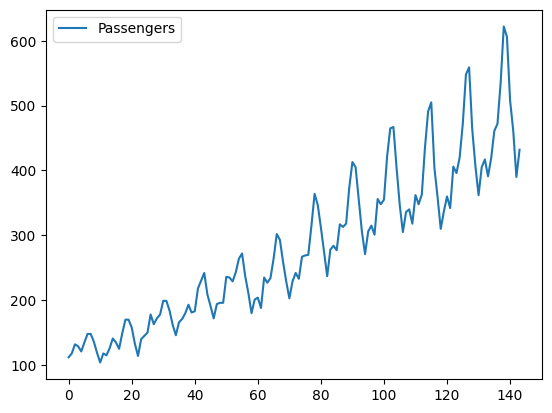

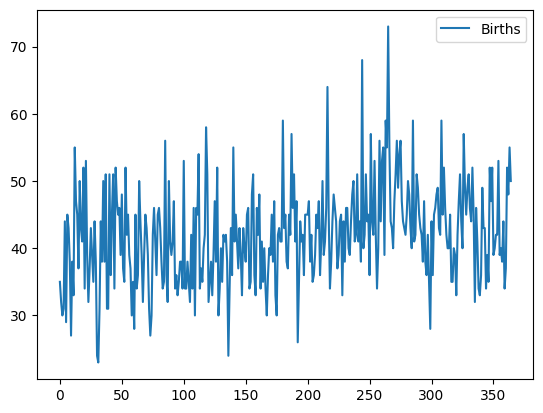

In [38]:
airline_data.plot()
birth_data.plot()

#### Airline
- Obvious trend
- Multiplicative model
- Strong seasonality

#### Births
- No obvious trend
- Additive model
- No obvious seasonality

### Exercise 5: Plot Mean and Variance Over Time
Task:
Divide both datasets into monthly segments and calculate the mean and variance for each segment to check if they change over time.


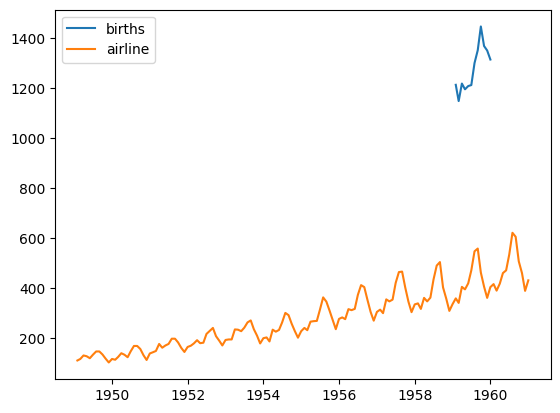

In [75]:
birth_data["Date"] = pd.to_datetime(birth_data["Date"])
airline_data["Month"] = pd.to_datetime(airline_data["Month"])
plt.plot(birth_data.resample(rule='M', on='Date')['Births'].sum(), label="births")
plt.plot(airline_data.resample(rule='M', on='Month')['Passengers'].sum(), label="airline")
plt.legend()

### Exercise 6: Assessing Stationarity with Histogram Plots
Task:
Plot histograms for both the airline passengers and births datasets to visually inspect their distributions. Assess whether the data appears to be normally distributed, which is one of the hallmarks of a stationary series.

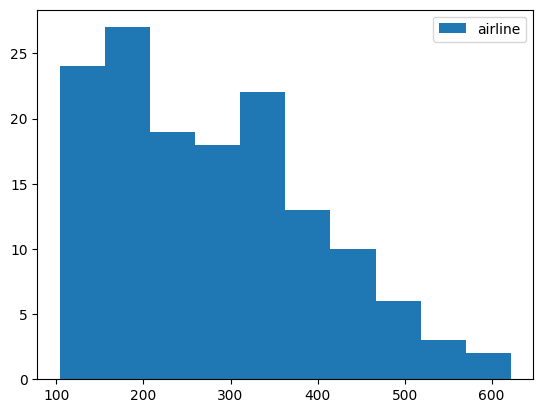

In [82]:
plt.hist(airline_data["Passengers"], label="airline")
plt.legend()

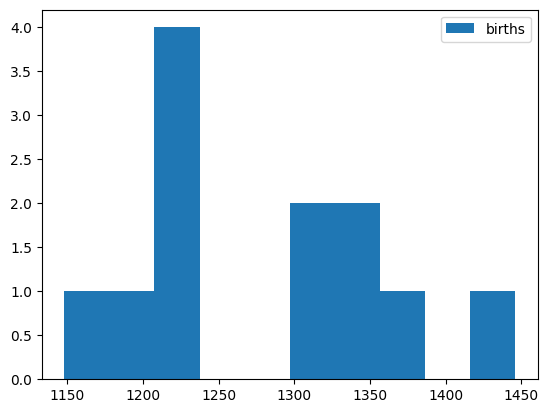

In [81]:
plt.hist(birth_data.resample(rule='M', on='Date')['Births'].sum(), label="births")
plt.legend()

### Exercise 7: Augmented Dickey-Fuller Test
Task:
Perform the Augmented Dickey-Fuller test on both datasets to statistically check for stationarity. Interpret the results, including the ADF statistic, the p-value, and the critical values, to determine whether the series are stationary or not.

In [ ]:
from statsmodels.tsa.stattools import adfuller


def adf_test(timeseries):
    print("Results of Dickey-Fuller Test:")
    dftest = adfuller(timeseries, autolag="AIC")
    dfoutput = pd.Series(
        dftest[0:4],
        index=[
            "Test Statistic",
            "p-value",
            "#Lags Used",
            "Number of Observations Used",
        ],
    )
    for key, value in dftest[4].items():
        dfoutput["Critical Value (%s)" % key] = value
    print(dfoutput)


In [86]:
adf_test(birth_data["Births"])

Results of Dickey-Fuller Test:
Test Statistic                  -4.808291
p-value                          0.000052
#Lags Used                       6.000000
Number of Observations Used    358.000000
Critical Value (1%)             -3.448749
Critical Value (5%)             -2.869647
Critical Value (10%)            -2.571089
dtype: float64


#### Analyse
* p-value < 0.05 -> nicht stationär
* [Kritische Werte](https://real-statistics.com/statistics-tables/augmented-dickey-fuller-table/) wie angegeben -> constant, no trend

In [85]:
adf_test(airline_data["Passengers"])

Results of Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


#### Analyse
* p-value > 0.05 -> stationär
* [Kritische Werte](https://real-statistics.com/statistics-tables/augmented-dickey-fuller-table/) wie angegeben -> constant, no trend

### Exercise 8: Autocorrelation
Task: Evaluate the autocorellation of both datasets using methods from todays lecture. Are there any significant lags for a later forecast?

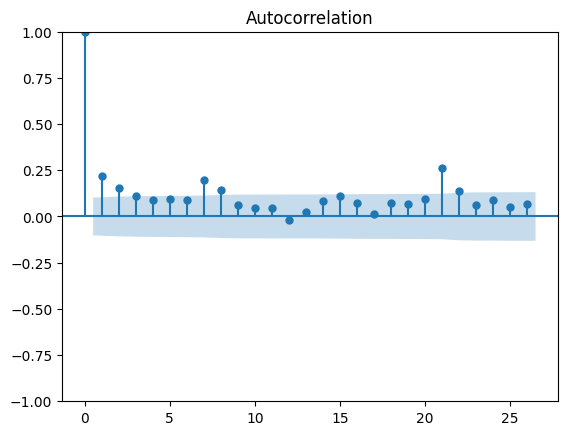

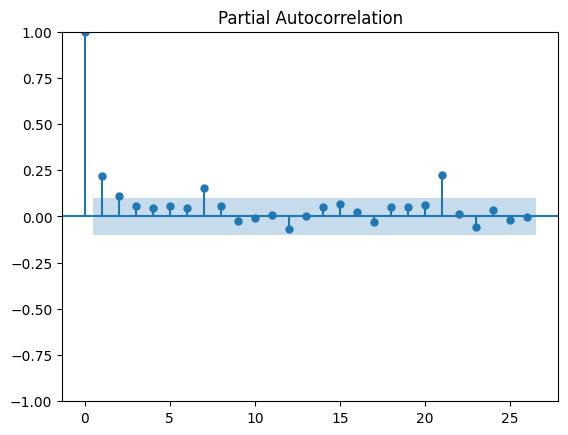

In [95]:
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(birth_data["Births"])
plot_pacf(birth_data["Births"])
plt.show()

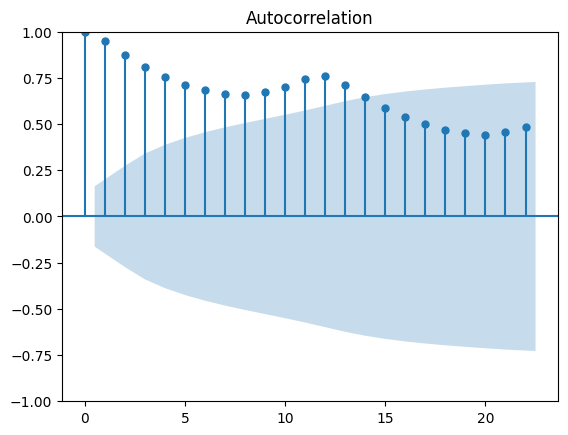

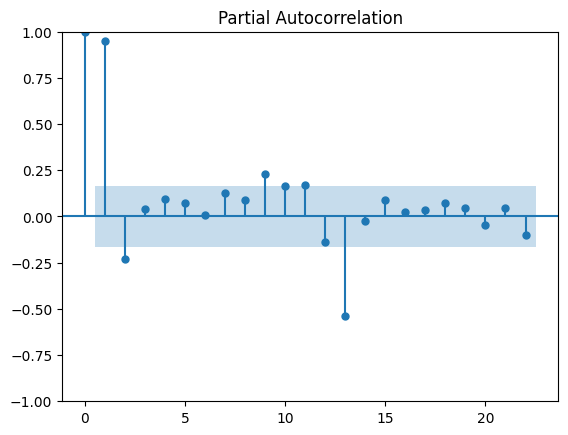

In [96]:
plot_acf(airline_data["Passengers"])
plot_pacf(airline_data["Passengers"])
plt.show()